# CPI price trends 

This is code for a python workshop with LSE undergraduate economics students to assess price ridigity and trends using UK CPI data.

__The brief__

You are an economics consultant and have been approached by an ecommerce business who are looking to expand the products available on their platform. They would like you to provide an analysis of popular items for UK consumers and their corresponding price trends. As an online site they might also want to know about regional differences and how that might inform their firm's pricing decisions. 

# Motivation 

The source of price rigidity is a foundational question in macroeconomics, and one which improvments in data is consistently shifting our understanding of. This data has been provided by [Richard Davies](https://richarddavies.io/research/the-uk-consumer-basket) where you can also find the corresponding draft paper. 

<img src="london, alcohol prices.png" alt="london, alcohol prices" width="400"/>

## Related literature 
For the purposes of the weekend, we suggest only skimming one or two of the papers. Given you are time constrained, you should not spend a lot of your time on this. 

Klenow P and Malin B (2010), “Microeconomic Evidence on Price Setting”, prepared for the Handbook of Monetary Economics. Available [here](https://www.nber.org/papers/w15826)

Kehoe, Patrick and Virgiliu Midrigan (2014) “Prices are Sticky After All," Journal of Monetary Economics. Available [here](https://www.sciencedirect.com/science/article/pii/S0304393214001809)

Nakamura, Emi and Jón Steinsson (2013), “Lost in Transit: Product Replacement Bias and Pricing to Market”, American Economic Review 2012, 102(7): 3277–3316. [here](https://www.aeaweb.org/articles?id=10.1257/aer.102.7.3277)


# Import relevant packages
Students should be familiar with most these packages, you will use the usual pandas, numpy and mapplotlib - no additions needed (I hope!).

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
This will be a more discursive task. There is no correct answer. 

__TIP__ You should however explain what the CBI basket is and understand how basket items are selected and deselected. 

The price data come from monthly records of prices known as ‘price quotes’ that are recorded by the Office for National Statistics (ONS). The price quotes files contain information on the item sold, its location, the shop and shop type (the size of the establishment) it is sold in, and whether it was offered at a sale or regular price. In the past year the ONS have also begun collecting prices from online retailers. The final raw data has over 32m observations. The dataset you will be using is not the original ONS price quotes data** but a smaller, cleaner sample with fewer basket items available to download from [here](). 

** all datasets from 1996- present are available to explore [here](https://www.ons.gov.uk/economy/inflationandpriceindices/datasets/consumerpriceindicescpiandretailpricesindexrpiitemindicesandpricequotes)

In [8]:
df1= pd.read_csv('everpresent10items,short.csv')

df1.head(n=2)

,date,year,month,item,description,price,region
0,1,1996,1,206,CHOCOLATE,0.26,South East
1,1,1996,1,206,CHOCOLATE,0.28,South East


# Inspect the data
Once you import the data, you want to look at what the data is telling us and how we can use it.

Need to get to know the data you're using before doing any analysis.

It is also good practise to check the data is clean so you can iron out issues before getting stuck part-way through. 

__TIP__: Note down some of the interesting stats from here - this will be helpful when giving your presentation.

In [9]:
df1.shape

(60056, 7)

In [15]:
df1.describe()

,date,year,month,item,price
count,60056.000000,60056.000000,60056.000000,60056.000000,60056.000000
mean,139.920774,2007.120338,6.476722,579.541295,11.997865
std,83.317790,6.946337,3.472142,271.938691,33.983840
min,1.000000,1996.000000,1.000000,206.000000,0.200000
25%,66.000000,2001.000000,3.000000,390.000000,1.150000
50%,142.000000,2007.000000,6.000000,443.000000,2.490000
75%,213.000000,2013.000000,10.000000,789.000000,8.000000
max,280.000000,2019.000000,12.000000,1146.000000,1625.000000


In [17]:
df1.count()

date           60056
year           60056
month          60056
item           60056
description    60056
price          60056
region         60056
dtype: int64

In [18]:
df1.tail(n=2)

,date,year,month,item,description,price,region
60054,280,2019,4,1146,MINICAB,4.2,Scotland
60055,280,2019,4,1146,MINICAB,6.0,Wales


You now want to find out what the 10 items are that you have in this dataset 

In [19]:
df1.description.unique()

array(['CHOCOLATE', 'COFFEE', 'SANDWICH', 'CRISPS', 'VODKA', 'CIGARETTES',
       'MENS JACKET/COAT', "WOMEN'S JUMPER", 'MASCARA', 'MINICAB'],
      dtype=object)

Do the same for regions. 

__Q__: Is this the data split by the 4 nations or by NUTS1 regions?

In [21]:
df1.region.unique()

array(['South East', 'Scotland', 'North', 'London', 'North West',
       'Yorkshire & Humber', 'West Midlands', 'East Anglia', 'South West',
       'Wales', 'East Midlands', 'Northern Ireland',
       'Catalogue collections'], dtype=object)

### (check the data is clean)
Next, we check that there are no zero prices, and some other tests for problematic data. 

Since the data is pre-cleaned, the results to this should all be negative, but it is good practise to assess your datasets! 

In [13]:
df1[df1.price ==0]

,date,year,month,item,description,price,region


Now we check if there are any empty cells

In [20]:
pd.isnull(df1)

,date,year,month,item,description,price,region
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
60051,False,False,False,False,False,False,False
60052,False,False,False,False,False,False,False
60053,False,False,False,False,False,False,False
60054,False,False,False,False,False,False,False


So far it looks likes the data is clean and we know what were are using. Let's make a start on our analysis.

In [23]:
choc = df1[df1.description =='CHOCOLATE']

In [24]:
choc.head(n=2)

,date,year,month,item,description,price,region
0,1,1996,1,206,CHOCOLATE,0.26,South East
1,1,1996,1,206,CHOCOLATE,0.28,South East


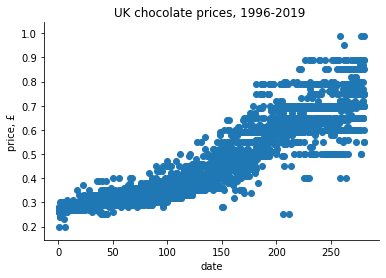

In [30]:
plt.scatter(choc['date'].values, choc['price'].values)

plt.title('UK chocolate prices, 1996-2019 ')
plt.xlabel('date')
# Set y-axis label
plt.ylabel('price, £')
sns.despine() #neater layout, not needed if you haven't imported/installed the package 'seaborn'
plt.show()

Clearly, this doesn't look great and doesn't tell us much information.

We can create percentiles to have a broader look at the price trends of our items. 

# Creating percentiles 

We want to create percentiles p10 to p90 for each of our ten items. 

In [ ]:
percentiles = 